![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [6]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [7]:
from sklearn.preprocessing import MinMaxScaler

# Create dummy variables for 'sex' column
penguins_df = pd.get_dummies(penguins_df, columns=['sex'], drop_first=True)

# Display the dataframe after creating dummy variables
penguins_df.head()

# Standardize the dataset
scaler = MinMaxScaler()
penguins_scaled = scaler.fit_transform(penguins_df)

# Convert the scaled data back to a DataFrame
penguins_scaled_df = pd.DataFrame(penguins_scaled, columns=penguins_df.columns)

# Display the scaled dataframe
penguins_scaled_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,0.254545,0.666667,0.152542,0.291667,1.0
1,0.269091,0.511905,0.237288,0.305556,0.0
2,0.298182,0.583333,0.389831,0.152778,0.0
3,0.167273,0.738095,0.355932,0.208333,0.0
4,0.261818,0.892857,0.305085,0.263889,1.0


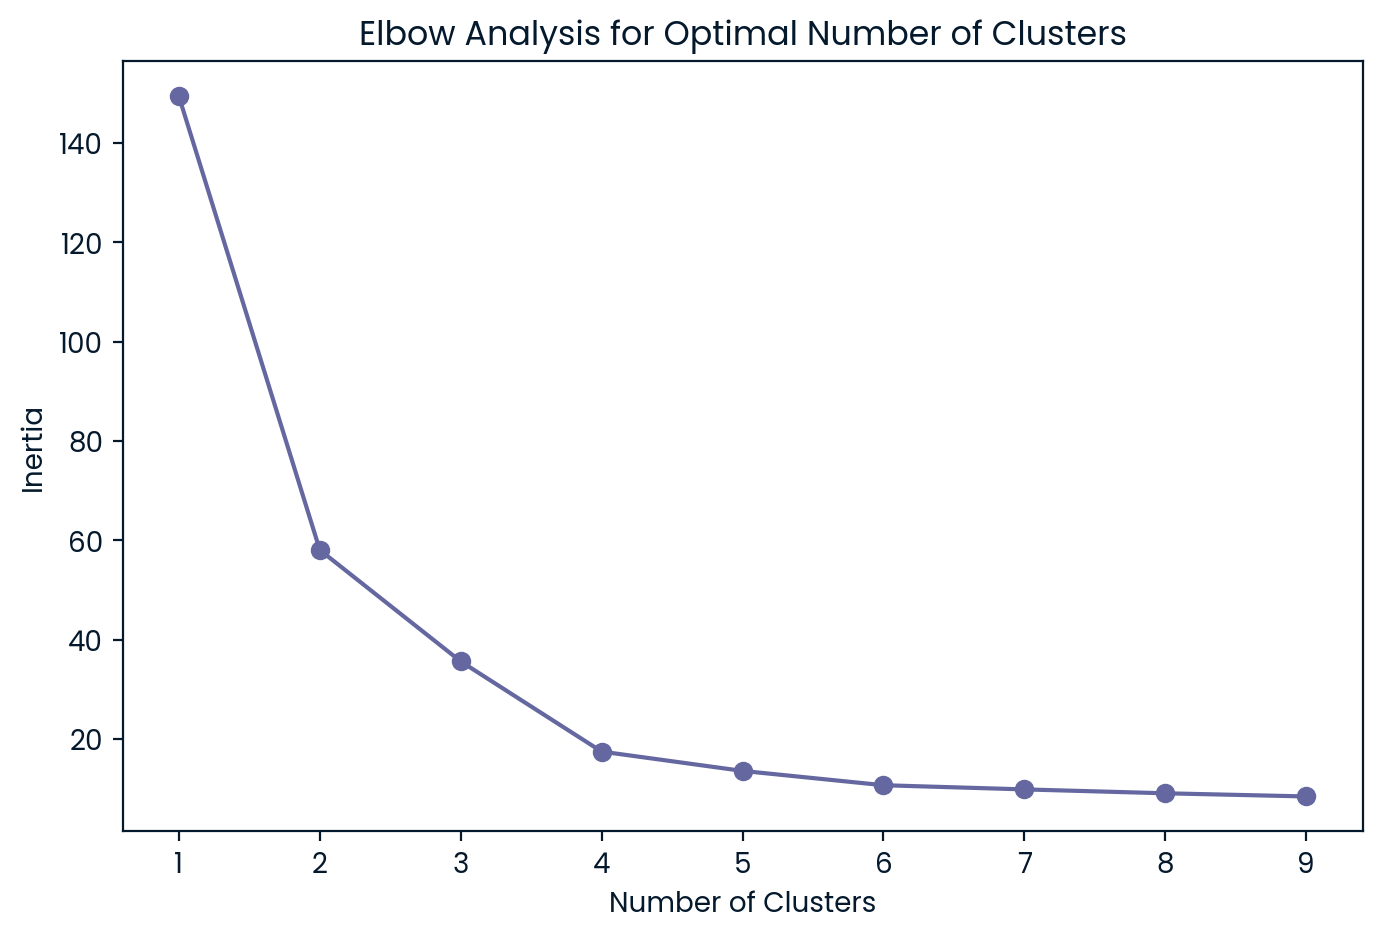

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow analysis to determine the optimal number of clusters
inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(penguins_scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Analysis for Optimal Number of Clusters')
plt.show()


In [9]:
# Apply K-Means clustering with 3 clusters
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
penguins_scaled_df['label'] = kmeans.fit_predict(penguins_scaled_df)

# Display the dataframe with the cluster labels
penguins_scaled_df.head()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE,label
0,0.254545,0.666667,0.152542,0.291667,1.0,1
1,0.269091,0.511905,0.237288,0.305556,0.0,0
2,0.298182,0.583333,0.389831,0.152778,0.0,0
3,0.167273,0.738095,0.355932,0.208333,0.0,0
4,0.261818,0.892857,0.305085,0.263889,1.0,1


In [10]:
# List of numeric columns
numeric_columns = penguins_df.columns

# Create the final characteristic DataFrame
stat_penguins = penguins_scaled_df.groupby('label')[numeric_columns].mean().reset_index()

# Display the final characteristic DataFrame
stat_penguins


,label,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_MALE
0,0,0.363526,0.395887,0.429892,0.322854,0.0
1,1,0.428302,0.715633,0.385833,0.362945,1.0
2,2,0.631773,0.311671,0.839678,0.773566,1.0
